In [2]:
import pandas as pd

# csvファイルをデータフレームとして読み込む
df = pd.read_csv("/content/sample_data/sample_pandas_6.csv")

df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [3]:
def tax(x):
  return x * 1.1

df['単価'].apply(tax)

,単価
0,858.0
1,99.0
2,858.0
3,660.0
4,660.0
...,...
195,660.0
196,99.0
197,363.0
198,462.0


In [4]:
df['発注日'] = pd.to_datetime(df['発注日'])

In [5]:
df.agg({'発注日':['max','mean','min']})

,発注日
max,2024-12-26 00:00:00
mean,2020-01-27 14:16:48
min,2015-01-02 00:00:00


In [6]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
df = pd.concat([df, tax_series], axis=1)

df.head()

,発注日,商品番号,商品名,単価,在庫,注文数,単価（税込み）
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0


In [7]:
category_df = pd.read_csv('/content/sample_data/category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [8]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,単価（税込み）,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0,弁当
...,...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0,雑貨


In [9]:
import matplotlib.pyplot as plt

In [10]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=74258e1107bdda4c3932b9efcb46847d026f0a20db4adea07fa09ab0b07fec07
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [11]:
import japanize_matplotlib

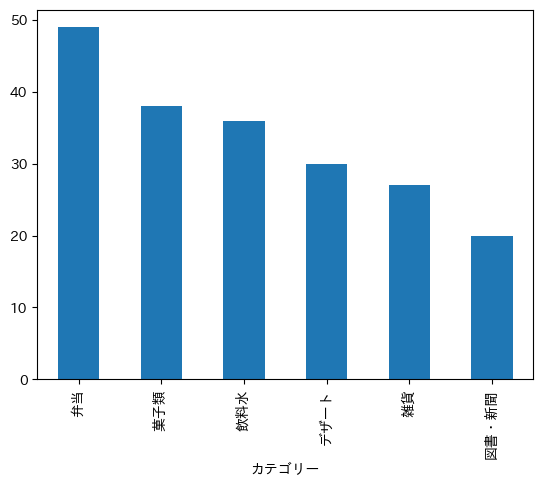

In [12]:
category = df['カテゴリー'].value_counts()
category.plot(kind='bar')
plt.show()

In [13]:
df.groupby('カテゴリー')['注文数'].sum()

,注文数
カテゴリー,
デザート,804
図書・新聞,666
弁当,1668
菓子類,1272
雑貨,894
飲料水,894


In [14]:
df.groupby('カテゴリー')['注文数'].describe()

,count,mean,std,min,25%,50%,75%,max
カテゴリー,,,,,,,,
デザート,30.0,26.800000,19.021585,0.0,12.0,24.0,42.0,60.0
図書・新聞,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
弁当,49.0,34.040816,18.223107,0.0,18.0,36.0,48.0,60.0
菓子類,38.0,33.473684,20.293438,0.0,18.0,42.0,48.0,60.0
雑貨,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
飲料水,36.0,24.833333,20.138804,0.0,6.0,24.0,42.0,60.0
